> This is a duplicate notebook from the original one [here](https://qiskit.org/textbook/ch-quantum-hardware/density-matrix.html).

> Very nice demonstration about pure and mixed states, densitry matrix, etc. Meanwhile, we can get a direct feel about how quamtum mechanics principles are applied in the quantum computation.

# The Density Matrix & Mixed States

Throughout the majority of the Qiskit textbook, we have been representing the state of our qubits using the state-vector notation introduced in the [Representing Qubit States](../ch-states/representing-qubit-states.ipynb) section. Working with this representation is convenient when dealing with states that can always be expressed as a [linear combination](../ch-appendix/linear_algebra.ipynb#Spanning-Sets,-Linear-Dependence,-and-Bases) of basis states, each with an associated probability amplitude. However, in quantum computation and quantum communication, there are many practical scenarios in which the state of our qubits cannot be written down as linear combinations in a given basis, but instead must be expressed in terms of ensembles (statistical mixtures) of multiple states, each with an associated probability of occurrence.

For example, consider the case where Alice wants to send Bob the state $| + \rangle$. Imagine that, due to noise in their communication channel, there is a chance that the relative phase of the state could flip with some probability $p$. Therefore, Bob could end up with the "flipped" state $| - \rangle$ (with probability $p$), or with the desired state $| + \rangle$ (with probability $1 - p$). Notice that Bob’s state is either $| + \rangle$ **or** $| - \rangle$, but not a quantum superposition of the two. Thus, if we want to know what will happen to Bob’s qubit after he, for instance, applies some gates and performs a measurement, we will have to consider both of these cases separately. This might not be too difficult a task when dealing with only two states, but in situations where the number of possible states is larger, keeping track of how each of these states evolves individually can become impractical. As we will see throughout this section, this is where the density matrix representation comes in handy.

Simply put, the density matrix is an alternative way of expressing quantum states. However, unlike the state-vector representation, this formalism allows us to use the same mathematical language to describe both the more simple quantum states we've been working with so far (*pure states*), as well as the *mixed states* that consist of ensembles of pure states.

We will now formally introduce the density matrix notation by looking at the how it is used to represent both pure and mixed states.


## Contents
1. [Pure States](#pure)    
    1.1 [Exercises](#ex1)
2. [Mixed States](#mixed)    
    2.1 [Example](#example)    
    2.2 [Exercises](#ex2)    
3. [Properties of the Density Matrix](#properties)    
4. [The Reduced Density Matrix](#reduced)    
    4.1 [Exercises](#ex4)
5. [Mixed States in the Bloch Sphere](#bloch)


## 1. Pure States <a id="pure"></a>

Pure states are those for which we can precisely define their quantum state at every point in time. For example, if we initialize the single qubit $|q \rangle $ in state $ | 0 \rangle $, and apply a Hadamard gate, we know our final state will be:

$$ 
| q \rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle  + | 1 \rangle  \right) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = | + \rangle 
$$

We understand that if we were to perform a measurement of this state, the outcome will be probabilistic. We will measure state $ | 0 \rangle $ with $ 50 \% $ probability, state $ | 1 \rangle $ with $ 50 \% $ probability. However, **before** performing any measurements we can say with $ 100 \% $ certainty that, if our qubit initialization process and our Hadamard gate are ideal, the resulting quantum state will always be $ | + \rangle $. We therefore say that, since there is no uncertainty on what this quantum state will be, $ |q \rangle $ is a pure state.

In general, we know that in the conventional state vector notation, an $n$-qubit pure state can be expressed as:

$$ | \psi \rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}, $$

where $ N = 2^{n} $. An alternative way to express this pure quantum state is in the form of a matrix. This can be done by using the density operator representation, which is defined as:

$$ \rho \equiv  | \psi \rangle \langle \psi | $$

Here, the term $| \psi \rangle \langle \psi | $ represents the [outer product](../ch-gates/proving-universality.ipynb#outer) of the state $ \psi $ with itself:


$$ 
\begin{aligned}
& \rho = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_N \end{bmatrix} \begin{bmatrix} \alpha_0^* & \alpha_1^* & \dots & \alpha_N^* \end{bmatrix} 
\\
\\
& \rho = \begin{bmatrix} |\alpha_0|^2 & \alpha_0 \alpha_1^* & \dots & \alpha_0 \alpha_N^* \\ \alpha_1 \alpha_0^* & |\alpha_1|^2 & \dots & \alpha_1 \alpha_N^* \\ \vdots & \vdots & \ddots & \vdots \\ \alpha_N \alpha_0^* & \alpha_N \alpha_1^* & \dots & |\alpha_N|^2 \end{bmatrix}
\end{aligned}
$$


Let's consider, for example, the following two-qubit, maximally-entangled pure state:

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0 0 \rangle + | 1 1 \rangle \right ) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} 
$$


The density matrix representation for this state is then given by:

$$ 
\begin{aligned}
& \rho_{AB}  = | \psi_{AB} \rangle \langle \psi_{AB} |
\\
\\
& \rho_{AB} = \left ( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} \right ) \left ( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 0 & 0 & 1 \end{bmatrix} \right )
\\
\\
& \rho_{AB} = \frac{1}{2} \begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \\ \end{bmatrix}
\end{aligned}
$$


In Qiskit, we can use the ``quantum_info`` module to represent quantum states either in state vector notation, or in the density matrix representation. For convenience, we will import this module as ``qi``:

In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

Let's once again consider the entangled pure state $| \psi_{AB} \rangle $. We can prepare this state by applying a Hadamard gate to the first qubit, and an CNOT between the first and second qubits:

In [2]:
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.cx(0,1)
qc_AB.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

To obtain the state constructed by our ``QuantumCircuit`` in state vector notation, we can make use of the ``Statevector.from_instruction()`` class method from the ``quantum_info`` module as follows:

In [3]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

Similarly, we can use the ``DensityMatrix.from_instruction()`` class method to obtain density matrix representation for this same state:

In [4]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

As expected, the result matches our calculation. We can also visualize the density matrix using a cityscape plot of the state:

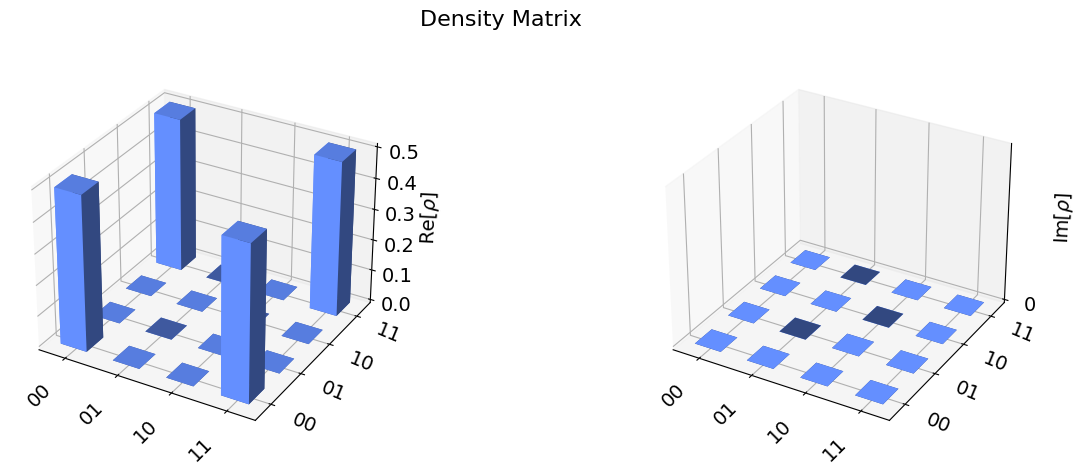

In [5]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

Now, all we have done so far is show a different way to represent quantum states, but there is no apparent advantage in doing so. To understand why the density matrix representation is beneficial, we need to learn about the concept of mixed states.

### 1.1 Exercises  <a id="ex1"></a>
Find the corresponding density matrix for the following pure states. Use Qiskit to prepare the states, and verify your results using the ``quantum_info`` module:

1.$ \frac{1}{\sqrt{2}} \left ( |0\rangle - i |1\rangle \right ) $   


2.$ \frac{1}{2}\left ( |0 0 \rangle + |0 1 \rangle + |1 0 \rangle + |1 1 \rangle \right ) $       


## 2. Mixed States <a id="mixed"></a>

Mixed states are those that consist of statistical ensembles of different quantum states. This means that, unlike pure states, mixed states cannot be represented as linear superpositions of normalized state vectors. Lets first take a look at a simple example to explain what we mean by this. 

Consider, once again, the two-qubit entangled state:

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$

Here we have explicitly used the subscripts $A$ and $B$ to label the qubits associated with registers $q_1$ and $q_0$, respectively. Now, let's assume that right after preparing our state $| \psi_{AB} \rangle $ we perform a measurement on register $q_1$, as shown below:

<img src="images/bell_and_measure.png" width="500"/>

We can now ask the question: What will the state on register $q_0$ be right after performing the measurement on register $q_1$? 

As we learned in the [Multiple Qubits and Entangled States](../ch-gates/multiple-qubits-entangled-states.ipynb#entangled) section, we know that since qubits $A$ and $B$ are entangled, measuring a ``0`` in register $q_1$ implies that the quantum state in register $q_0$ will immediately project onto state $| 0_B \rangle$:

$$ \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle) \quad \xrightarrow[]{\text{measure}} \quad |0_A\rangle | 0_B\rangle \quad \text{(with probability of 50%)} $$

Similarly, measuring a ``1`` in register $q_1$ will project $q_0$ onto state $ | 1_B \rangle $:

$$ \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle) \quad \xrightarrow[]{\text{measure}} \quad |1_A\rangle | 1_B\rangle \quad \text{(with probability of 50%)} $$

So how do we, in general, represent the final state in register $q_0$ (labeled as $\psi_B$ in the diagram), not for a specific measurement outcome in $q_1$, but for an arbitrary result of this measurement process? 

We know that after a measurement, $\psi_B$ will be in state $| 0_B \rangle $ with probability $1/2$, or in state $| 1_B \rangle $ with probability $1/2$; however, $\psi_B$ is **not** in a linear superposition of $| 0_B \rangle $ and $| 1_B \rangle $. In other words, $\psi_B$ **cannot** be expressed as a state vector of the form $1/\sqrt{2} \left (|0_B \rangle + | 1_B \rangle \right)$. Instead, we have to use a different notation to write down that $\psi_B$ is rather an ensemble (not a quantum superposition) of the states $| 0_B \rangle $ and $| 1_B \rangle $, and whose outcome depends on what we measure on register $q_1$. 

We then call $\psi_B$ a mixed state, which can be represented as an ensemble of states:

$$
\left \{| \psi_{B_0} \rangle , | \psi_{B_1} \rangle \right \} = \left \{ | 0_B \rangle , | 1_B \rangle \right \},
$$ 

each with an associated probability of occurrence:

$$ \left \{ p_0, p_1 \right \} = \left \{ 1/2, 1/2 \right \} $$

What this representation shows is that, upon measurement of $q_1$, $\psi_B$ will be in either state $| 0_B \rangle $ ``or`` state $| 1_B \rangle $, each with a classical probability of occurrence of $ 1/2$. Notice we avoided using the ket notation for state $\psi_B$ since we reserve kets only for state vectors that can be written as linear combinations in an orthonormal basis, which $\psi_B$ is not.

In general, a mixed state consisting of an ensemble of n pure states can be expressed in the form of a list of outcome elements:

$$
\left \{ |\psi_j \rangle \right \}_{j = 1}^n = \left \{ | \psi_1 \rangle, | \psi_2 \rangle, \dots, | \psi_n \rangle \right \},
$$ 

where each item has a corresponding probability of occurrence given by:

$$
\left \{ p_j \right \}_{j = 1}^n = \left \{ p_1, p_2, \dots, p_n \right \}
$$

Here, $p_j$ corresponds to the <i>classical</i> probability of the system being in state $|\psi_j \rangle$, and the total number of possible states, $n$, need not be equal to the dimension of the underlying [Hilbert space](https://qiskit.org/textbook/ch-appendix/linear_algebra.html#Hilbert-Spaces,-Orthonormality,-and-the-Inner-Product).

Although this way of expressing $\psi_B$ (or any general mixed state) is perfectly valid, it turns out to be somewhat inconvenient. Since a mixed state can consist of a myriad of pure states, it can be difficult to track how the whole ensemble evolves when, for example, gates are applied to it. It is here that we turn to the density matrix representation.

A mixed state, consisting of several possible outcome pure states $|\psi_j \rangle$ , each with probability of occurrence $p_j$, is defined as a density matrix of the form:

$$ \rho \equiv \sum_{j} p_j |\psi_j \rangle \langle \psi_j | $$

It is easy to see that this general definition of the density matrix also holds for pure states, for which we will only have one $ |\psi_j \rangle $ term with $p_j = 1$.

So, going back to our example, we know that since the two possible outcomes of state $\psi_B$ are $| 0_B \rangle $ or $| 1_B \rangle $, both with classical probability of occurence of $1/2$, we can construct the following density matrix for this state:

$$ 
\begin{aligned}
\rho_B & = \frac{1}{2} | 0_B \rangle \langle 0_B | + \frac{1}{2} | 1_B \rangle \langle 1_B |
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 \\ 0 \end{bmatrix} \begin{bmatrix} 1 & 0 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 \\ 1 \end{bmatrix} \begin{bmatrix} 0 & 1 \end{bmatrix} 
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} + \frac{1}{2} \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} 
\\
\\
& = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{aligned}
$$

At this point, it is important to highlight that the $|\psi_j \rangle $ states that compose an ensemble need not be basis states (like $ | 0 \rangle $ and $ | 1 \rangle )$; these states can in fact be any arbitrary normalized pure state, as we will show in the next example.

### 2.1 Example <a id="example"></a>

Let's consider the case where we initialize a qubit in the $ |0 \rangle $ state, and then apply a Hadamard gate. Now, unlike the scenario we described for [pure states](#pure), this Hadamard gate is not ideal. Due to errors in the quantum-computer hardware, only 80% of the times the state is prepared, this Hadamard gate produces the desired state:

$$ | \psi_1 \rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle  + | 1 \rangle  \right) $$

The remaining 20% of the times, the pulse applied to rotate the state is either too short or too long by $\frac{\pi}{6}$ radians about the x-axis. This means that when we use this Hadamard gate, we could end up with following two undesired outcome states:

$$ | \psi_2 \rangle = \frac{\sqrt{3}}{2}| 0 \rangle  + \frac{1}{2} | 1 \rangle, \quad \quad | \psi_3 \rangle = \frac{1}{2} | 0 \rangle  + \frac{\sqrt{3}}{2} | 1 \rangle $$

The figure below shows the Bloch representation for the three possible states our qubit could take if the short pulse happens 10% of the time, and the long pulse the remaining 10% of the time:

<img src="images/noisyH_states.png" width="750"/>

Since we do not know the outcome of our qubit everytime we prepare it, we can represent it as a mixed state of the form:

$$ \rho_H = \frac{4}{5} | \psi_1 \rangle \langle \psi_1 | + \frac{1}{10} | \psi_2 \rangle \langle \psi_2 | + \frac{1}{10} | \psi_3 \rangle \langle \psi_3 | $$

Here, the factors $\frac{4}{5}, \frac{1}{10}$ and $\frac{1}{10}$ correspond to the classical probabilities of obtaining the states $| \psi_1 \rangle, | \psi_2 \rangle$ and $| \psi_3 \rangle$, respectively. 

By replacing each of these three possible state vectors into $\rho$, we can find the density matrix that represents this mixture:

$$
\begin{aligned}
& \rho_H = \frac{4}{5} \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \end{bmatrix} + \frac{1}{10} \begin{bmatrix} \frac{3}{4} & \frac{\sqrt{3}}{4} \\ \frac{\sqrt{3}}{4} & \frac{1}{4} \end{bmatrix} + \frac{1}{10} \begin{bmatrix} \frac{1}{4} & \frac{\sqrt{3}}{4} \\ \frac{\sqrt{3}}{4} & \frac{3}{4} \end{bmatrix}
\\
\\
& \rho_H = \begin{bmatrix} \frac{1}{2} & \frac{\sqrt{3}}{20} + \frac{2}{5} \\ \frac{\sqrt{3}}{20} + \frac{2}{5} & \frac{1}{2} \end{bmatrix}
\end{aligned}
$$

In Qiskit, we can define the density matrix of mixed states by directly inputting the matrix values into the ``DensityMatrix`` class:

In [6]:
import numpy as np
rho_H_matrix = np.array([[1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2]])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>

From this example, we can see how the density matrix representation can help us construct useful and realistic models that capture the effects of non-ideal (noisy) environmental or external sources on both ideal quantum states and quantum gates.

### 2.2 Exercises  <a id="ex2"></a>

Derive and compare the density matrices for: 

1. A pure one-qubit state in an equal superposition of $| 0 \rangle$ and $| 1 \rangle $: 
    
    $ \rho_p = | \psi_p \rangle \langle \psi_p |, \text{ with } |\psi_p \rangle = \tfrac{1}{\sqrt{2}} \left ( | 0 \rangle + | 1 \rangle \right )$
    
    
2. A mixed one-qubit state in an equal mixture of $| 0 \rangle $ and $| 1 \rangle $: 
    
    $ \rho_{m} = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 | $

## 3. Properties of the Density Matrix  <a id="properties"></a>


### Unitary Evolution <a id="evolution"></a>

A very natural question to ask at this point is: How do mixed states evolve under [unitary operations](../ch-gates/proving-universality.ipynb#2.2-Unitary-and-Hermitian-matrices-)? It can be shown, with little effort, that if an initial arbitrary state $|\psi_j \rangle$ with probability of occurrence $p_j$ evolves into the state $\hat U|\psi_j \rangle$ after a unitary evolution, then the evolution of a density matrix, consisting of an essemble of normalized states $\{|\psi_j \rangle \}_{j = 1}^{n}$ with probabilities $\{p_j\}_{j = 1}^{n}$, is given by:

$$ 
\rho = \sum_{j} p_j |\psi_j \rangle \langle \psi_j | \enspace \xrightarrow[]{\enspace \hat U \enspace} \enspace \rho' = \sum_{j} p_j \hat U |\psi_j \rangle \langle \psi_j | \hat U^{\dagger} = \hat U \rho \hat U^{\dagger}
$$

Here, $\hat U^{\dagger}$ is the conjugate transpose of the operator $\hat U$. So, for example, let's consider the following mixed state:

$$
\begin{align}
\rho_{0} &= \frac{1}{3} | 1 \rangle \langle 1 | + \frac{2}{3} | + \rangle \langle + |
\\
\\
&= \frac{1}{3} \begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix} + \frac{2}{3} \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \end{bmatrix}
\\
\\
&= \begin{bmatrix} \frac{1}{3} & \frac{1}{3} \\ \frac{1}{3} & \frac{2}{3} \end{bmatrix} 
\end{align}
$$

If we are interested in knowing what will be the resulting state $\rho_{0}'$ after a [Y Pauli gate](../ch-states/single-qubit-gates.ipynb#ynzgatez) is applied, we then have:

$$
\begin{align}
\rho_{0}' = Y \rho_{0} Y^{\dagger} &= \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{3} & \frac{1}{3} \\ \frac{1}{3} & \frac{2}{3} \end{bmatrix} \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
\\
\\
&= \begin{bmatrix} \frac{2}{3} & -\frac{1}{3} \\ -\frac{1}{3} & \frac{1}{3} \end{bmatrix} 
\end{align}
$$

We can also use Qiskit to evolve mixed states through unitary operators. Let's first define our state by using the `DensityMatrix.from_label()` method:

In [7]:
rho_0 = 1/3*qi.DensityMatrix.from_label('1') + 2/3*qi.DensityMatrix.from_label('+')
rho_0.draw('latex', prefix='\\rho_0 = ')

<IPython.core.display.Latex object>

We can now define our operator in a similar way, but using the matrix `Operator` class:

In [8]:
from qiskit.visualization import array_to_latex
Y = qi.Operator.from_label('Y')
array_to_latex(Y.data, prefix='Y =')

<IPython.core.display.Latex object>

Lastly, we can evolve our mixed state by using the `DensityMatrix.evolve()` method:

In [9]:
rho_0p = rho_0.evolve(Y)
rho_0p.draw('latex', prefix='\\rho\'_0 = ')

<IPython.core.display.Latex object>

### Matrix Elements <a id="matrix_elems"></a>

We understand that in the case of pure states in the state vector representation, each vector element corresponds to a probability amplitude. But what do the elements of the density matrix represent?

Consider, once again, a general mixed state $\rho$ consisting of an ensemble of pure states $\{|\psi_j \rangle \}_{j = 1}^{n}$, each with probability of occurrence $\{p_j\}_{j = 1}^{n}$:

$$ \rho = \sum_{j} p_j |\psi_j \rangle \langle \psi_j | $$

We know that each individual pure state $ |\psi_j \rangle $ can be written as a linear superposition of elements forming a complete orthonormal basis $\left \{ |\phi_u \rangle \right \}_{u = 1}^{m}$:

$$ |\psi_j \rangle = \sum_{u} \alpha_{u}^{(j)} |\phi_u \rangle $$

We can then replace this expression into our definition of our general mixed state, and get a density matrix in terms of the orthonormal basis elements:

$$ 
\rho = \sum_{j} p_j \left ( \sum_{u} \alpha_{u}^{(j)} |\phi_u \rangle \right ) \left (  \sum_{v} \left ( \alpha_{v}^{(j)} \right )^* \langle \phi_v | \right ) 
$$

Since the coefficients $ p_j, \alpha_{u}^{(j)}, \left ( \alpha_{v}^{(j)} \right )^* $ are just numbers, we can reorganize the expression as:

$$
\begin{aligned}
& \rho = \sum_{u, v} \left ( \sum_{j} p_j \alpha_{u}^{(j)} \left ( \alpha_{v}^{(j)} \right )^* \right ) |\phi_u \rangle \langle \phi_v | 
\\
\\
& \rho = \sum_{u,v} \rho_{uv} |\phi_u \rangle \langle \phi_v |, 
\end{aligned}
$$

where $\rho_{uv}$ are the individual matrix elements in the $\left \{ |\phi_u \rangle \right \}_{u = 1}^{m}$ basis (the term inside parentheses). Written in matrix form, $\rho$ is given by:

$$ 
\rho = \begin{bmatrix} \rho_{11} & \rho_{12} & \dots & \rho_{1m} \\ \rho_{21} & \rho_{22} & \dots & \rho_{2m} \\ \vdots & \vdots & \ddots & \vdots \\ \rho_{m1} & \rho_{m2} & \dots & \rho_{mm} \end{bmatrix}
$$

It's worth noticing that, in $\rho_{uv}$, the diagonal terms $\rho_{kk}$ actually correspond to the probability of finding the system in a particular basis state $|\phi_k \rangle$:

$$
\rho_{kk} = \sum_{j} p_j \alpha_{k}^{(j)} \left ( \alpha_{k}^{(j)} \right )^* = \sum_{j} p_j |\alpha_{k}^{(j)} |^{2}
$$

Here, $|\alpha_{k}^{(j)} |^{2}$ corresponds to the probability of finding the basis state $|\phi_k \rangle$ within a given $ |\psi_j \rangle $ state, so summing over all $p_j$ values gives us the total probability of the whole system being in state $|\phi_k \rangle$.

On the other hand, the off-diagonal terms of the matrix are a measure of the *coherence* between the different basis states of the system. In other words, they can be used to quantify how a pure superposition state could evolve (decohere) into a mixed state.

Lastly, it is not very difficult to show from the definition of $\rho_{uv}$ that $\rho_{vu}^* = \rho_{uv}$, which basically means the density matrix is Hermitian ($\rho^\dagger = \rho$).

### Trace and Positivity Conditions <a id="trace_positivity"></a>

A density matrix that represents a valid pure or mixed state must satisfy two conditions:

1. Its trace must be equal to one: 

    Remembering that the <a href="https://en.wikipedia.org/wiki/Trace_(linear_algebra)">trace of a matrix</a> (denoted as $\text{Tr}$) is the sum of its diagonal terms, we have:

    $$ \text{Tr}(\rho) =\sum_{k} \rho_{kk} = \sum_{k} \sum_{j} p_j |\alpha_{k}^{(j)} |^{2} = \sum_{j} p_j \sum_{k} |\alpha_{k}^{(j)} |^{2} = 1
    $$

    This follows as all basis states are normalized, and all probabilities must add to 1:

    $$ \sum_{k} |\alpha_{k}^{(j)} |^{2} = 1 \quad \text{and} \quad \sum_{j} p_j = 1, $$

2. The matrix must be [positive-semidefinite](https://en.wikipedia.org/wiki/Definite_matrix): 
    
    For an arbitrary state $|\psi_q \rangle $ that is part of the state space:
    
    $$ 
    \langle \psi_q | \rho | \psi_q \rangle = \sum_{j} p_j \langle \psi_q |\psi_j \rangle \langle \psi_j | \psi_q \rangle = \sum_{j} p_j |\langle \psi_q |\psi_j \rangle |^{2} \geq 0 
    $$

### State Purity <a id="trace_sqr"></a>

A very useful property of the density matrix is that when taking the trace $\text{Tr}$ of its square $\rho^{2}$, we obtain a scalar value $\gamma$ that is good measure of the purity of the state the matrix represents. For normalized states, this value is always less than or equal to 1, with the equality occurring for the case of a pure state:

$$ \gamma \equiv \text{Tr}(\rho^{2}) \leq 1 $$

$$ \gamma \equiv \text{Tr}(\rho^{2}) = 1 \; \text{if pure} $$

In Qiskit, we can easily extract the purity of a density matrix by using the `purity()` class method. For example, for the pure state $| + \rangle$, we should expect to see a purity of 1:

In [10]:
rho_p = qi.DensityMatrix.from_label('+')
display(rho_p.draw('latex', prefix='\\rho_p = '))
gamma_p = rho_p.purity()
print("State purity: ", np.round(np.real(gamma_p),3))

<IPython.core.display.Latex object>

State purity:  1.0


And, for a mixed state, like $\rho_m = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 | $, we expect a purity of less than 1:

In [11]:
rho_m = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('1'))
display(rho_m.draw('latex', prefix='\\rho_m = '))
gamma_m = rho_m.purity()
print("State purity: ", np.round(np.real(gamma_m),3))

<IPython.core.display.Latex object>

State purity:  0.5


### Non-uniqueness <a id="non_uniqueness"></a>

One of the drawbacks of representing the density matrices in terms of ensembles of basis states, is that their outcome is not unique. Consider, for example, the following two mixed states:

$$
\rho_{m1} = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 | \quad \text{and} \quad \rho_{m2} = \frac{1}{2} | + \rangle \langle + | + \frac{1}{2} | - \rangle \langle - | 
$$

These are clearly mixtures of different pure states; however, if we express $\rho_{m2} $ in the computational basis, we get:

$$ 
\begin{aligned}
\rho_{m2} & = \frac{1}{2} \left ( \frac{1}{\sqrt{2}} \left( | 0 \rangle + | 1 \rangle \right ) \frac{1}{\sqrt{2}} \left( \langle 0 | + \langle 1 | \right ) \right ) + \frac{1}{2} \left ( \frac{1}{\sqrt{2}} \left( | 0 \rangle - | 1 \rangle \right ) \frac{1}{\sqrt{2}} \left( \langle 0 | - \langle 1 | \right ) \right )
\\
\\
& = \frac{1}{4} \left ( | 0 \rangle \langle 0 | + | 0 \rangle \langle 1 | + | 1 \rangle \langle 0 | + | 1 \rangle \langle 1 | \right ) + \frac{1}{4} \left ( | 0 \rangle \langle 0 | - | 0 \rangle \langle 1 | - | 1 \rangle \langle 0 | + | 1 \rangle \langle 1 | \right )
\\
\\
& = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 |,
\end{aligned}
$$

which is identical to $\rho_{m1}$. Understanding that the same density matrix can represent many different ensembles of quantum states is important to avoid drawing conclusions about a particular system simply based on its density matrix representation alone. For example, if we were to sample quantum states from the system described by $\rho_{m1}$, we will get different states than if we were to sample $\rho_{m2}$ ($|0 \rangle $ or $|1 \rangle $ vs. $|+ \rangle $ or $|- \rangle $). So, even though these density matrices correctly capture the outcome probabilities of $\rho_{m1}$ and $\rho_{m2}$ upon measurement, care must be taken when using this representation if subtleties of a system must be understood.

## 4. The Reduced Density Matrix  <a id="reduced"></a>

Another advantage of working with the density matrix notation is that, when dealing with composite systems, it provides a practical way to extract the state of each subsystem, even if they are entangled. This is done in the form of what is known as the reduced density matrix.

Consider a quantum system composed of subsystems $A$ and $B$, and fully described by the density matrix $\rho_{AB}$. The reduced density matrix of subsystem $A$ is then given by:

$$ \rho_{A} = \text{Tr}_B(\rho_{AB}), $$


Here, $\text{Tr}_B$ is an operation known as the partial trace, which is defined as: 

$$
\text{Tr}_B \left (| \xi_u \rangle \langle \xi_v | \otimes | \chi_u \rangle \langle \chi_v | \right ) \equiv | \xi_u \rangle \langle \xi_v | \text{ Tr} \left ( | \chi_u \rangle \langle \chi_v | \right )
$$

$| \xi_u \rangle $ and $| \xi_v \rangle $ are arbitrary states in the subspace of $A$, and $| \chi_u \rangle $ and $| \chi_v \rangle $ arbitrary states in the subspace of $B$. $\text{Tr}$ is the standard trace operation, which for two arbitrary states $\text{Tr} \left ( | \chi_u \rangle \langle \chi_v | \right ) = \langle \chi_v |\chi_u \rangle $. Similarly, we can calculate the reduced density matrix of subsystem $B$ using the partial trace over $A$:

$$
\text{Tr}_A \left (| \xi_u \rangle \langle \xi_v | \otimes | \chi_u \rangle \langle \chi_v | \right ) \equiv \text{Tr} \left ( | \xi_u \rangle \langle \xi_v | \right ) | \chi_u \rangle \langle \chi_v | 
$$

As an example, let's reconsider the pure entangled state:

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$

This system is then composed of single-qubit subsystem $A$ with basis vectors $ \left \{ |\xi_1 \rangle, |\xi_2 \rangle \right \} = \{ | 0_A \rangle, | 1_A \rangle \}$, and single-qubit subsystem $B$ with basis vectors $ \left \{ |\chi_1 \rangle, |\chi_2 \rangle \right \} = \{ | 0_B \rangle, | 1_B \rangle \}$. We know that this system is not separable (i.e., $| \chi_{AB} \rangle \neq |\chi_{A}\rangle \otimes |\chi_{B}\rangle$); however, by using the reduced density matrix, we can find a full description for subsystems $A$ and $B$ as follows.

The density matrix of our state $| \psi_{AB} \rangle$ can be expressed in terms of outer products of the basis vectors as:

$$
\rho_{AB} = | \psi_{AB} \rangle \langle \psi_{AB} | =  \frac{1}{2} \left [ | 0_A 0_B \rangle \langle 0_A 0_B | + | 0_A 0_B \rangle \langle 1_A 1_B | + | 1_A 1_B \rangle \langle 0_A 0_B | + | 1_A 1_B \rangle \langle 1_A 1_B | \right ]
$$


Now, to calculate the reduced density matrix for, let's say, subsystem $B$, we have:

$$
\begin{aligned}
\rho_{B} & = \text{Tr}_A(\rho_{AB})
\\
\\
& = \frac{1}{2}\left [ \text{Tr}_A(| 0_A 0_B \rangle \langle 0_A 0_B |) + \text{Tr}_A(| 0_A 0_B \rangle \langle 1_A 1_B |) + \text{Tr}_A(| 1_A 1_B \rangle \langle 0_A 0_B |) + \text{Tr}_A(| 1_A 1_B \rangle \langle 1_A 1_B |) \right ]
\\
\\
& = \frac{1}{2}\left [ \text{Tr}(| 0_A \rangle \langle 0_A |)| 0_B \rangle \langle 0_B | + \text{Tr}(| 0_A \rangle \langle 1_A |)| 0_B \rangle \langle 1_B | + \text{Tr}(| 1_A \rangle \langle 0_A |) | 1_B \rangle \langle 0_B | + \text{Tr}(| 1_A \rangle \langle 1_A |) | 1_B \rangle \langle 1_B | \right ]
\\
\\
& = \frac{1}{2}\left [ \langle 0_A | 0_A \rangle | 0_B \rangle \langle 0_B | + \langle 1_A | 0_A \rangle | 0_B \rangle \langle 1_B | + \langle 0_A | 1_A \rangle | 1_B \rangle \langle 0_B | + \langle 1_A | 1_A \rangle | 1_B \rangle \langle 1_B | \right ]
\\
\\
& = \frac{1}{2}\left [ | 0_B \rangle \langle 0_B | + | 1_B \rangle \langle 1_B | \right ]
\\
\\
&= \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} 
\end{aligned}
$$

At first glance, this result might seem rather strange. We started with the pure entangled state $|\psi_{AB} \rangle $, and  calculated that the state of one of its parts (subsystem $B$) is the mixed state $\rho_{B}$. However, going back to the first example given in [section 2](#mixed) above, we see that the result from calculating the reduced density matrix for $B$ is equivalent to the representation we obtained for $\psi_B$, when measurements were taken over qubit $A$. We can then conclude that the reduced density matrix $\rho_{B}$ is a way to describe the statistical outcomes of subsystem $B$, when the measurement outcomes of subsystem $A$ are averaged out. This is in fact what ”tracing out” subsystem $A$ means.

It is worth mentioning that so far we have described the concept of partial trace for a bipartite (two-part) system, but this can be generalized for multi-part systems.

In Qiskit, we can easily obtain the reduced density matrix of a system by using the ``partial_trace()`` function and passing the density matrix of the composite system, and a list with the subsystems to trace over:

In [12]:
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In this specific example, $\rho_A$ and $\rho_B$ are equal, but this is not always the case.

### 4.1 Exercises  <a id="ex4"></a>
Calculate the reduced density matrices for each of the following composite states. 

1. The pure state: $ |\psi_{pr} \rangle = \frac{1}{2} \left ( | 00 \rangle + | 01 \rangle + | 10 \rangle + | 11 \rangle \right )$


2. The mixed state: $ \rho_{mr} = \frac{1}{4} | \Phi^+ \rangle \langle \Phi^+ | + \frac{3}{4} | \Phi^- \rangle \langle \Phi^- |$, where $| \Phi^+ \rangle$ and $| \Phi^- \rangle$ are the Bell states:

    $| \Phi^+ \rangle = \frac{1}{\sqrt{2}} \left( |00 \rangle + |11 \rangle \right ) $

    $| \Phi^- \rangle = \frac{1}{\sqrt{2}} \left( |00 \rangle - |11 \rangle \right ) $


## 5. Mixed States in the Bloch Sphere  <a id="bloch"></a>

In the [Representing Qubit States](../ch-states/representing-qubit-states.ipynb#bloch-sphere) chapter, we learned how the state vector of a qubit can be visualized using the Bloch sphere representation. By parameterizing the probability amplitudes as a function of a polar angle $\theta$, and azimuthal angle $\varphi$, any normalized single-qubit state can be expressed as:

$$ 
|q \rangle = \cos\left(\frac{\theta}{2} \right ) | 0 \rangle + e^{i\varphi}\sin \left(\frac{\theta}{2} \right ) | 1 \rangle.
$$

The qubit can therefore be represented as a vector extending from the origin to the surface of a sphere of unit radius, with its orientation determined by these two angles.

This geometrical interpretation of states can be generalized to also include mixed states. This is done by relying on the fact that the density matrix of a single-qubit state can be expanded in the form:

$$ 
\begin{align}
& \rho = \frac{1}{2} \left ( \hat I + \vec r \cdot \hat{ \vec \sigma} \right )
\\
\\
& \rho = \frac{1}{2} \hat I + \frac{1}{2} r_x \hat \sigma_x + \frac{1}{2} r_y \hat \sigma_y + \frac{1}{2} r_z \hat \sigma_z, 
\end{align}
$$

where $\hat I$ is the identity matrix, and $\hat \sigma_x, \hat \sigma_y, \hat \sigma_z $ the $X, Y, Z$ [Pauli matrices](../ch-appendix/linear_algebra.ipynb), respectively:

$$
\hat I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix},
\quad
\hat \sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix},
\quad
\hat \sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix},
\quad
\hat \sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

The $r_x$, $r_y$ and $r_z$ coefficients correspond to the components of what is known as the Bloch vector $\vec r$. This is in fact the vector that represents our mixed state inside the Bloch sphere. Replacing the matrices into the expression for $\rho$ and simplifying:

$$
\rho = \frac{1}{2} \begin{bmatrix} 1 + r_z & r_x - i r_y \\ r_x + i r_y & 1 - r_z \end{bmatrix} 
$$

Let's reconsider the [example](#example) from section 2, where we obtained the density matrix:

$$
\rho_H = \begin{bmatrix} \frac{1}{2} & \frac{\sqrt{3}}{20} + \frac{2}{5} \\ \frac{\sqrt{3}}{20} + \frac{2}{5} & \frac{1}{2} \end{bmatrix}
$$

It is easy to see that, for this particular case:

$$ r_x = 2 \left(\frac{\sqrt{3}}{20} + \frac{2}{5} \right), \quad r_y = 0, \quad r_z = 0 $$

This means that, in the bloch sphere, $\rho_H$ is represented by a vector $\vec r$ extending from the origin in the positive x direction, with length $ r_x \approx 0.973 $.

In Qiskit, we can use the ``plot_bloch_multivector()`` function to plot the density matrix of our mixed state in the Bloch sphere:

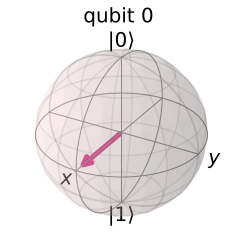

In [13]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(rho_H.data)

So, as expected, we get a vector along the positive x axis, with length slightly smaller than 1. This is a very convenient way of expressing that this state is not pure because it has been corrupted by noise. Rather than having to use three separate Bloch spheres to represent each of the three possible pure-state outcomes given in the example ($\psi_1, \psi_2, \psi_3 $), we now have a single Bloch vector representation for our noisy state.


One last scenario we might want to consider is the possibility of visualizing multi-qubit states using multiple Bloch spheres. We previously learned that, by the use of the [reduced density matrix](#reduced), we can actually find a representation for each individual part that makes up a composite state, even if the state is entangled. For instance, let's look at the following partially-entangled state:

$$
| \psi_{CD} \rangle = \frac{1}{2\sqrt{2}}\left ( \sqrt{3} | 0_C0_D \rangle + | 0_C1_D \rangle + | 1_C0_D \rangle + \sqrt{3} | 1_C1_D \rangle \right ).
$$

Here, $| 0_C0_D \rangle $ and $| 1_C1_D \rangle $ have the same probability of occurrence, but are 3 times more likely to occur than $ | 0_C1_D \rangle $ and $| 1_C0_D \rangle$. Since this is an entangled state, we know that it is not separable (i.e., $| \psi_{CD} \rangle \neq |\psi_{C}\rangle \otimes |\psi_{D}\rangle$); therefore, this state cannot be represented in terms of unit vectors in two individual Bloch spheres. However, by expressing $C$ and $D$ in terms of their reduced density matrices $\rho_C$ and $\rho_D$, we can then visualize the composite state as two Bloch vectors, one for each of these matrices.

In Qiskit, state $| \psi_{CD} \rangle $ can be generated using the following circuit:

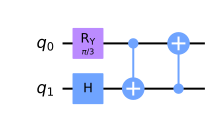

In [14]:
qc_CD = QuantumCircuit(2)
qc_CD.ry(np.pi/3,0)
qc_CD.h(1)
qc_CD.cx(0,1)
qc_CD.cx(1,0)
qc_CD.draw()

In [15]:
psi_CD = qi.Statevector.from_instruction(qc_CD)
psi_CD.draw('latex', prefix='|\\psi_{CD}\\rangle =')

<IPython.core.display.Latex object>

Alternatively, we can express this state in terms of its density matrix $\rho_{CD} = | \psi_{CD} \rangle \langle \psi_{CD} |: $

In [16]:
rho_CD = qi.DensityMatrix.from_instruction(qc_CD)
rho_CD.draw('latex', prefix='\\rho_{CD} =')

<IPython.core.display.Latex object>

And now, we can find the density matrices for the corresponding subsystems $C$ and $D$:

In [17]:
rho_D = qi.partial_trace(rho_CD,[0])
rho_C = qi.partial_trace(rho_CD,[1])

display(rho_D.draw('latex', prefix=" \\rho_{D} = "),
        rho_C.draw('latex', prefix=" \\rho_{C} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Each of these reduced density matrices has a Bloch vector associated with them, each with components:

$$ r_x \approx 0.86602, \quad r_y = 0, \quad r_z = 0 $$

So, if now we use the ``plot_bloch_multivector()`` function in Qiskit to plot the composite state $\rho_{CD}$, we see we get two Bloch vectors that correctly represent each of these reduced density matrices $\rho_C$ and $\rho_D$:

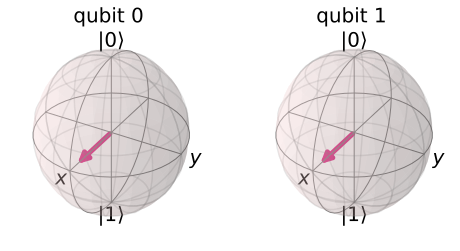

In [18]:
plot_bloch_multivector(rho_CD.data)

Understanding the Bloch vector representation for multi-qubit states explains why, when we try to plot a two-qubit maximally entangled state in the Bloch sphere, we get an "empty" plot. Since the reduced density matrices of a state like:

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$

are given by:

$$ 
\rho_A = \rho_B = \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \frac{1}{2} \hat I,
$$

we see that the Bloch vector components $r_x, r_y, r_z$ are all 0. Therefore, $\rho_A$ and $\rho_B$ actually have $\vec r $ vectors of zero length, represented by points at the origin of the sphere:

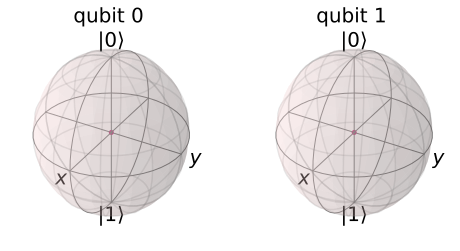

In [19]:
plot_bloch_multivector(rho_AB.data)

Although visualizing multi-qubit entangled states using Bloch spheres can provide some intuition about the quantum system in hand, it is important to remember that what we are plotting are the Bloch vectors of the individual reduced density matrices of each subsystem, and not of the state as a whole. Since density matrices are [not unique](#non_uniqueness), different quantum states can lead to the same representation. For example, the reduced density matrices for the four Bell states: $\tfrac{|00 \rangle + |11 \rangle}{\sqrt{2}}$, $\tfrac{|00 \rangle - |11 \rangle}{\sqrt{2}}$, $\tfrac{|01 \rangle + |10 \rangle}{\sqrt{2}}$, and $\tfrac{|01 \rangle - |10 \rangle}{\sqrt{2}}$, all lead to the same multivector Bloch representations (same as shown in the plot above). Therefore, this visualization should not be used to replace, but to complement, other multi-qubit visualization methods, such as the [q-sphere](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html).


## 6. References  <a id="references"></a>

[1] Nielsen, M. A., & Chuang, I. _Quantum Computation and Quantum Information,_ 2002.

[2] Benenti, G., Casati, G., & Strini, G. _Principles of Quantum Computation and Information-Volume II: Basic Tools and Special Topics,_ 2007.

In [20]:
import qiskit.tools.jupyter
%qiskit_version_table